<a href="https://colab.research.google.com/github/Yashmitha22/ML_projects/blob/main/Tensor_decomposition_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tensorly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 60.3 MB/s eta 0:00:00


In [6]:

#import the necessary datasets for it
import numpy as np
import tensorly as tl
from tensorly.decomposition import tucker
from skimage import data
from skimage.transform import resize
import matplotlib.pyplot as plt


In [18]:
#Load and prepare the image tensor
original_image = data.astronaut()
#Resizing the image,
original_image = resize(original_image, (128,128,3), anti_aliasing = True)

#cnvert image to a tensorly tensor object
tensor = tl.tensor(original_image)

In [19]:
rank = [32,32,3]
core , factors = tucker(tensor, rank=rank)

print(f'Original tensor shape:{tensor.shape}')
print(f"Core tensor shape: { core.shape}")
print(f'Factor matrix shapes: {[f.shape for f in factors]}')

Original tensor shape:(128, 128, 3)
Core tensor shape: (32, 32, 3)
Factor matrix shapes: [(128, 32), (128, 32), (3, 3)]


In [20]:
#Reconstructing the image from the compressed part
reconstructed_tensor = tl.tucker_to_tensor((core, factors))

#calculate the compression ratio
original_size = np.prod(tensor.shape)
compressed_size = tl.prod(core.shape) + sum(tl.prod(f.shape) for f in factors)
compression_ratio = original_size / compressed_size
print(f"\nCompression Ratio: {compression_ratio:.2f}")


Compression Ratio: 4.36


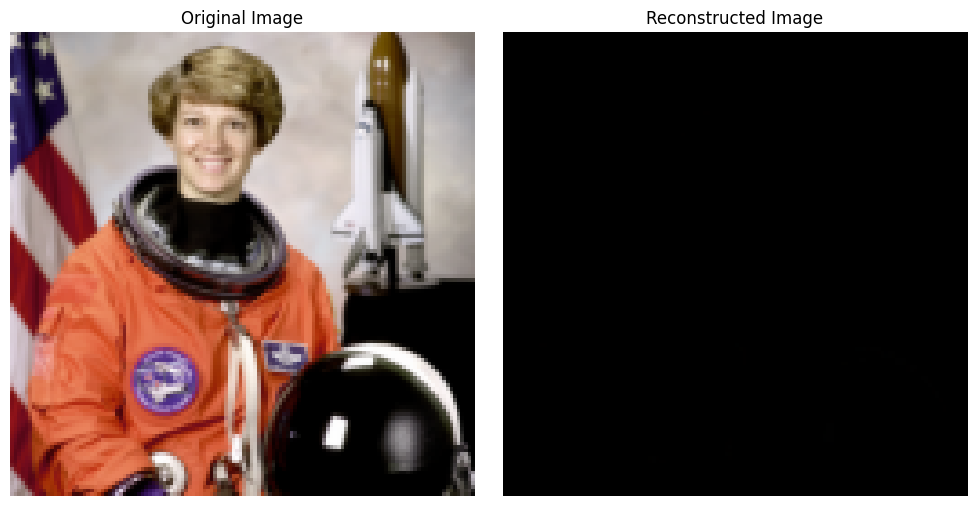

In [21]:
#Visualize teh result
fig, axes = plt.subplots(1,2, figsize=(10, 5))
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(reconstructed_tensor.astype(np.uint8))
axes[1].set_title('Reconstructed Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()